In [1]:
import sys
sys.path.insert(0, "/Users/labo_dupe/Documents/GitHub/PyImage/utils/")
import numpy as np
from PIL import Image
import os
from tifffile import imread
import matplotlib.pyplot as plt
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible
from plot_utils import singleplot, plotXY, doubleplot
from GaussFit import StripFit, Linescan, ShiftFit,FinalShiftFit
from HoughLine import show_hough_linetransform, show_ransac_points_line, show_plot, Correlation_plot,show_intensity_plot, Peak_Data
from bokeh.models import Label
from bokeh.io import export_png
from bokeh.plotting import figure, show, output_notebook
from IPython.display import clear_output
from bokeh.models import Range1d
import csv
from GaussFit import MakePath

In [2]:
targetdir = 'F:/Ozge/20190417_colorcorrected_croped/box_10um_LS_20px_40um'

Membraneimage = 'F:/Ozge/20190417_colorcorrected_croped/box_10um_LS_20px_40um/Ch1LineScan_C2-20190417_1x16_1TrackID1.tif'

Actinimage = 'F:/Ozge/20190417_colorcorrected_croped/box_10um_LS_20px_40um/Ch2LineScan_C2-20190417_1x16_1TrackID1.tif'


#Enter time unit in seconds
Time_unit = 5
#Enter pixel to micrometer conversion
Xcalibration = 0.1032
#Enter the number of pixels to be included in the fit
Fitaround= 8


#Symmetric psf as input (micrometers)
psf = 0.17

showaftertime = 100
inisigmaguess =  psf
#Size of linescan
skip = 50
singleblock = 80 

#Number of segments
numsegments = 10
id = []
for i in range(0, numsegments):
    id.append(i)
    
MakePath(targetdir)    
save_dir = targetdir + 'ls_data_block'    
MakePath(save_dir)


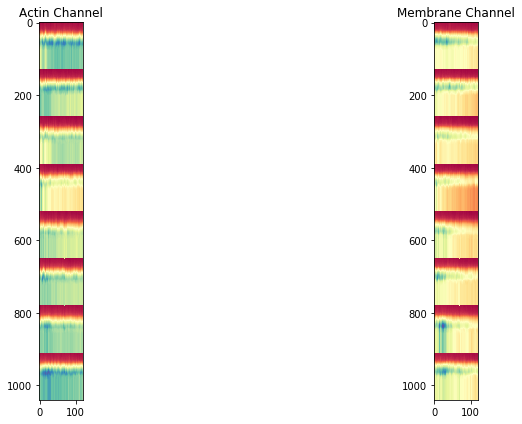

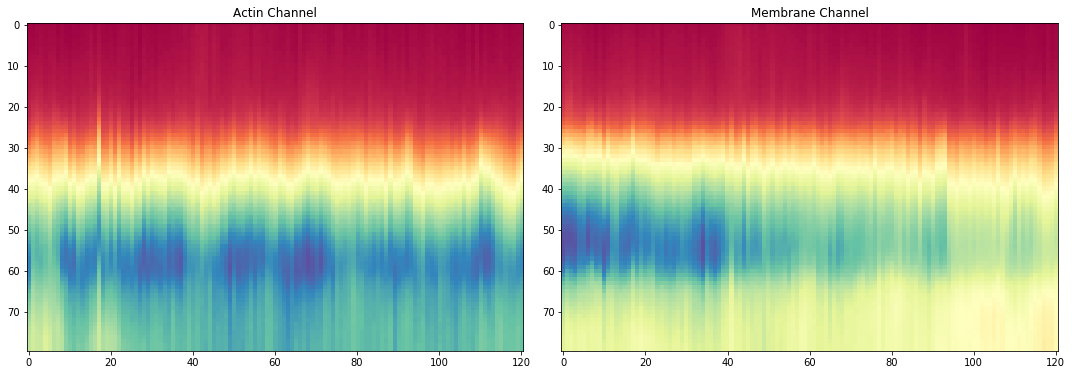

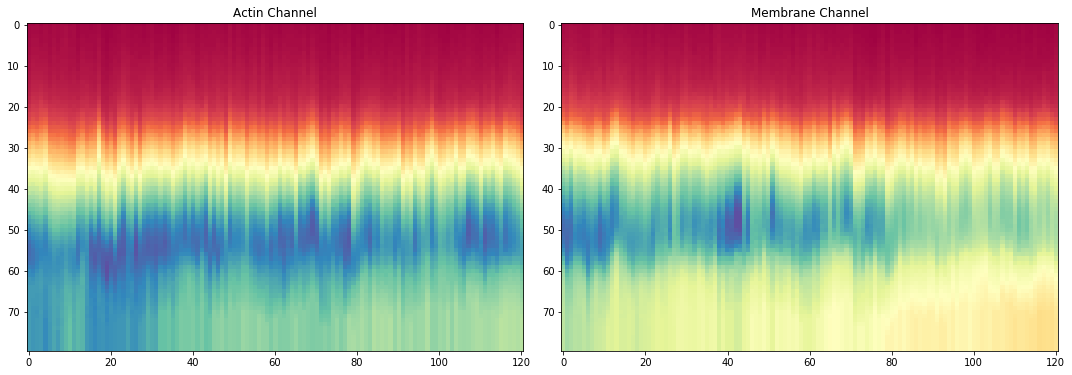

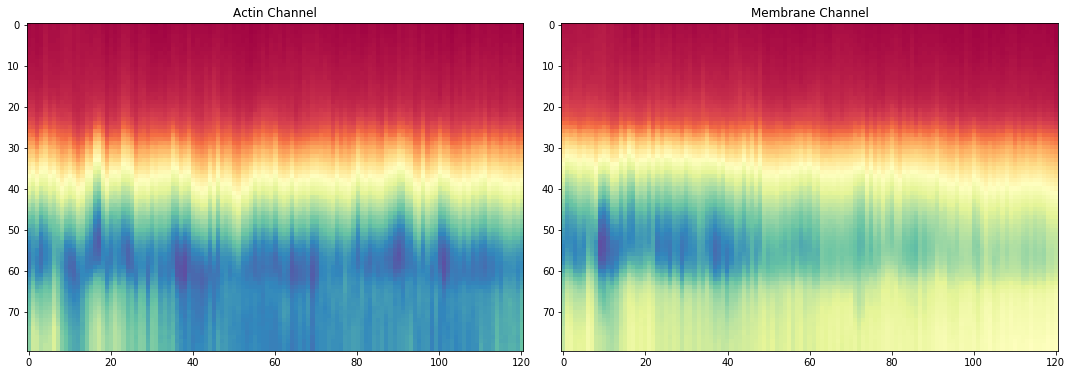

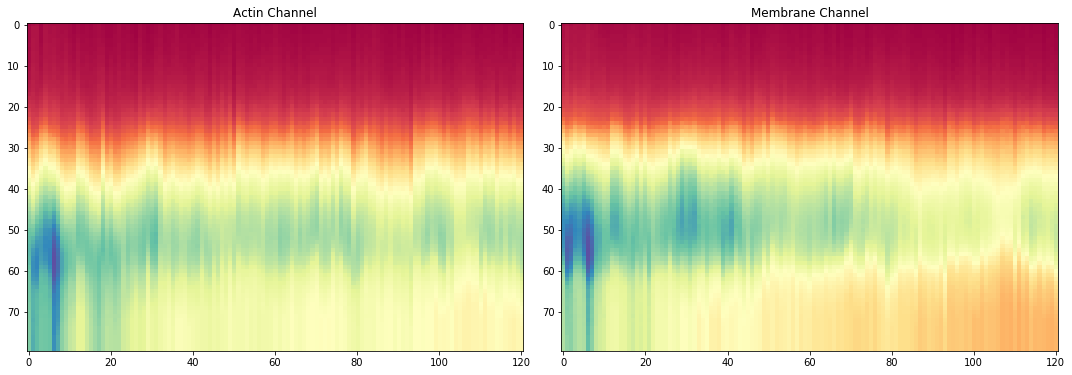

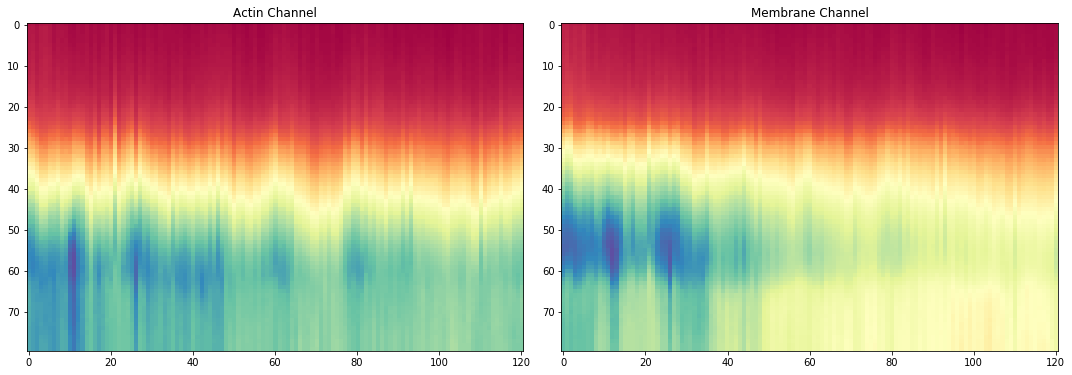

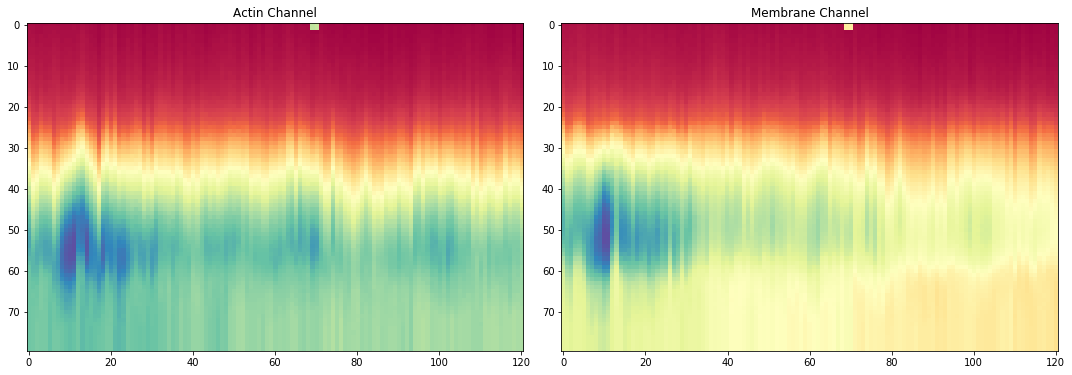

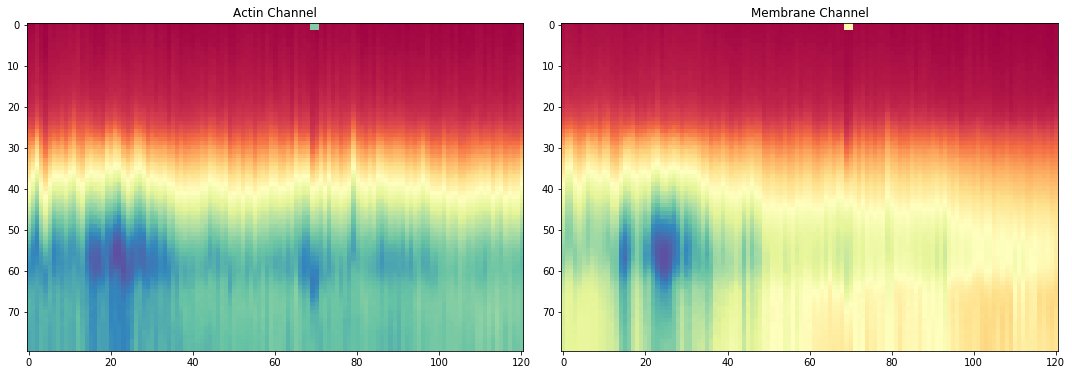

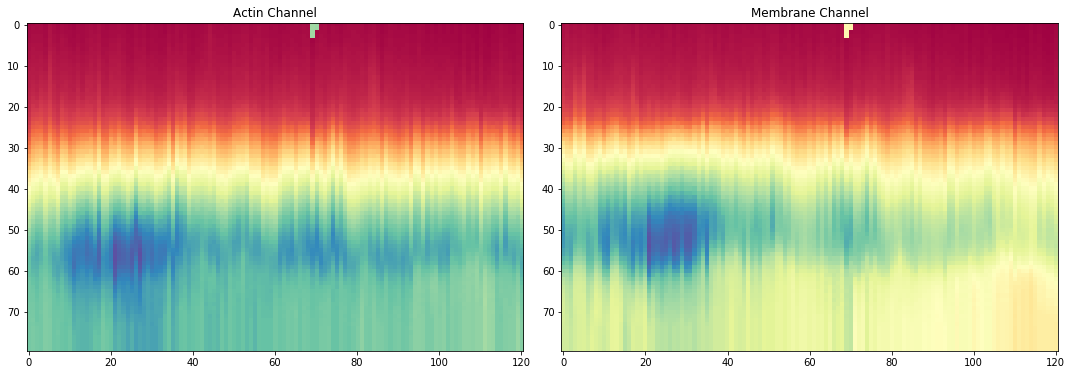

In [3]:
Actin = imread(Actinimage)
Membrane = imread(Membraneimage)

doubleplot(Actin, Membrane, 'Actin Channel', 'Membrane Channel')
blockimageActin = []
blockimageMembrane = []

i = 0
while i < Actin.shape[0]:
       
   blockActin = Actin[i:i + singleblock,:]#/np.amax(Actin[i:i + singleblock,:], 0)
   blockMembrane = Membrane[i:i + singleblock,:]#/np.amax(Membrane[i:i + singleblock,:],0)
   
   blockimageActin.append(blockActin)
   blockimageMembrane.append(blockMembrane)
   doubleplot(blockActin, blockMembrane, 'Actin Channel', 'Membrane Channel')
   i = i + singleblock + skip 

halflength = int(len(blockimageActin)/2)
otherhalf = len(blockimageActin) - halflength
totallength = len(blockimageActin)


block id 1


/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in true_divide
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in true_divide
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])


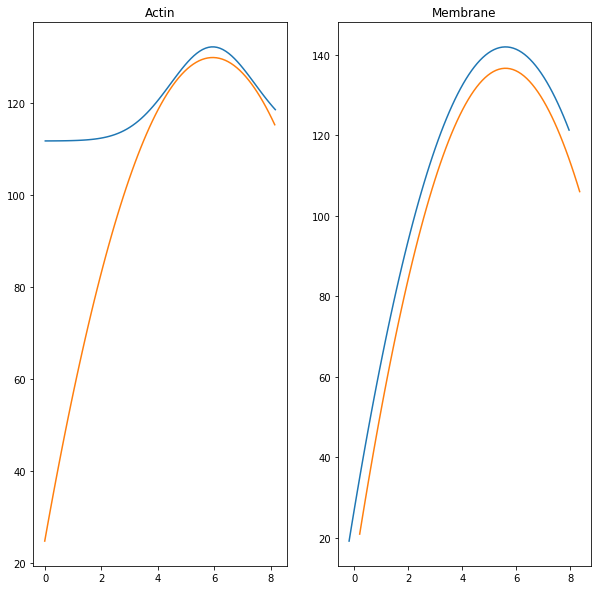

/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


Membrane Fit: (Amp, Sigma, PeakPos, C) [ 1.13591904e+05  1.79588523e+01  5.59050201e+00 -2.38413617e+03]
Actin Fit: [184.46158152   2.1578905    5.96284093  96.89521975]


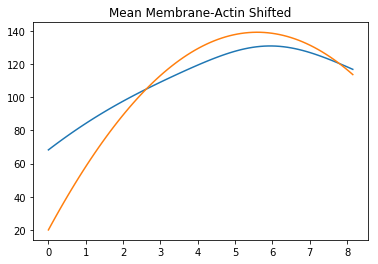

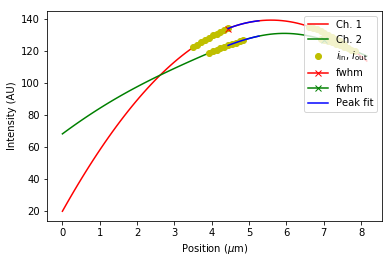

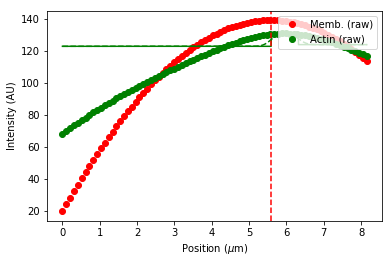

Thickness (nm), center cortex , cortical actin intensity (from fit) 734.1141180353289 5.957559067199203 131.23867053126324


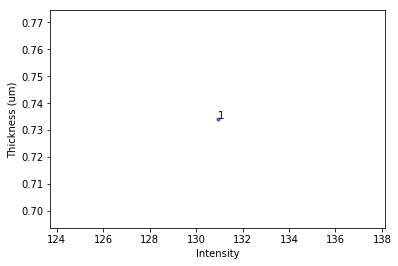

Thickness (min) 734.1141180353289 nm
Thickness (median) 734.1141180353289 nm
Thickness (max) 734.1141180353289 nm
block id 2


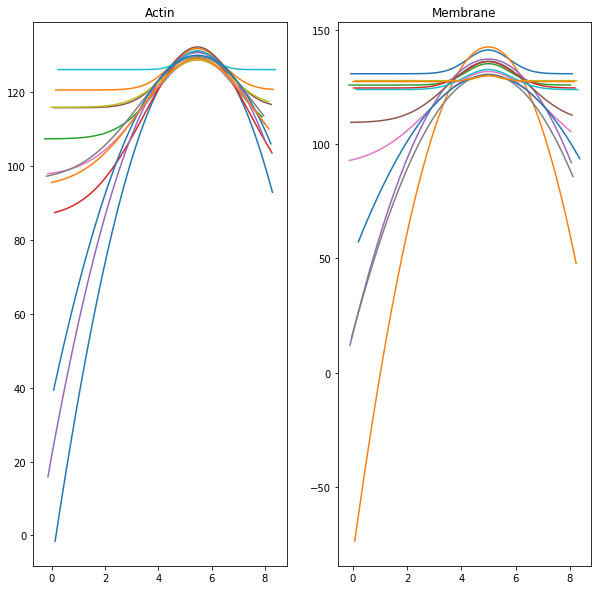

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 25.91831913   0.95376409   5.00027411 123.46322576]
Actin Fit: [ 64.65127034   1.39108409   5.43276279 111.46750886]


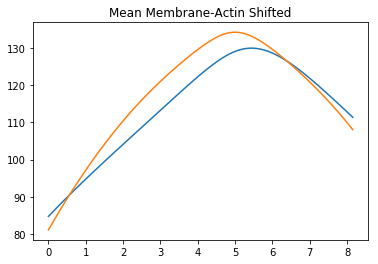

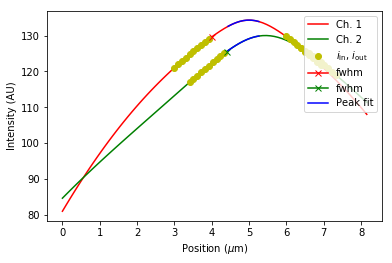

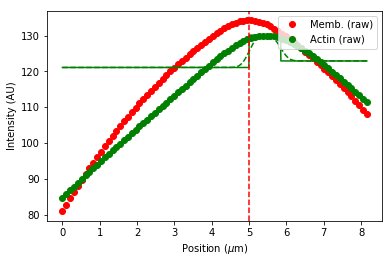

Thickness (nm), center cortex , cortical actin intensity (from fit) 849.6170295306362 5.425082625372269 130.10868835094917


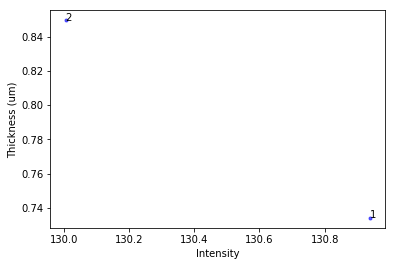

Thickness (min) 734.1141180353289 nm
Thickness (median) 791.8655737829826 nm
Thickness (max) 849.6170295306362 nm
block id 3


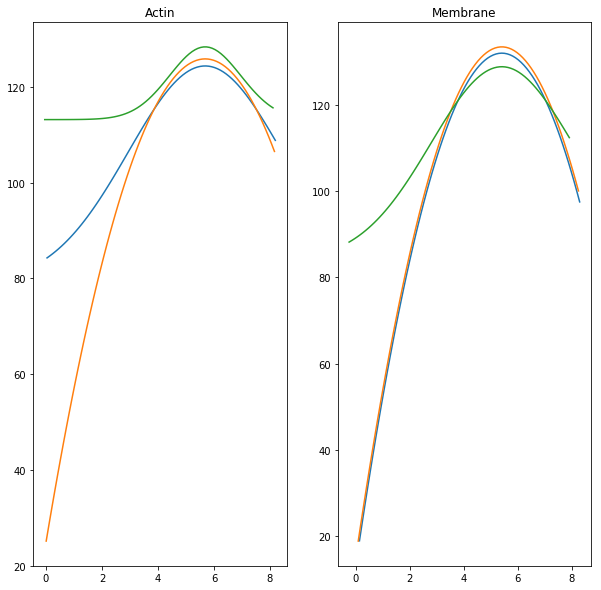

Membrane Fit: (Amp, Sigma, PeakPos, C) [1329.85255469    4.10370075    5.39555165    2.08531543]
Actin Fit: [134.51977546   1.96965206   5.70489559  98.98377271]


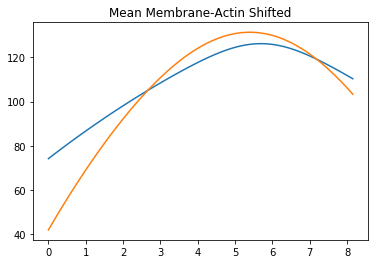

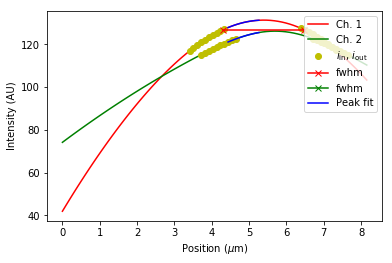

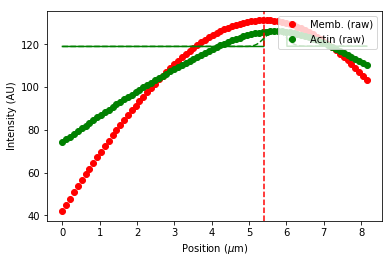

Thickness (nm), center cortex , cortical actin intensity (from fit) 617.3350412925055 5.704219167048541 126.76201327926458


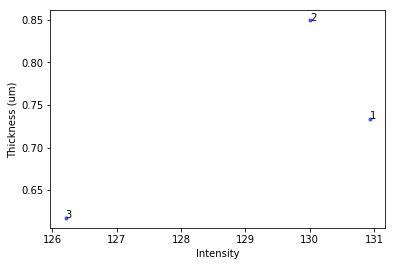

Thickness (min) 617.3350412925055 nm
Thickness (median) 734.1141180353289 nm
Thickness (max) 849.6170295306362 nm
block id 4


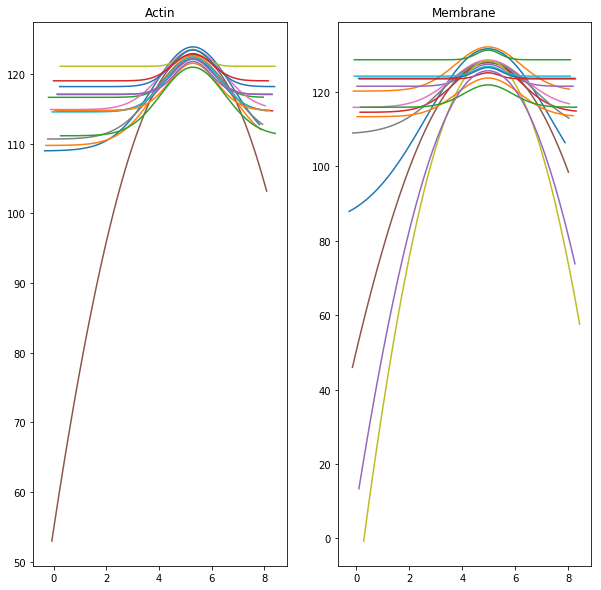

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 10.60113073   0.78104096   4.96310328 122.0748039 ]
Actin Fit: [ 15.82117964   0.94206359   5.26540913 115.71941341]


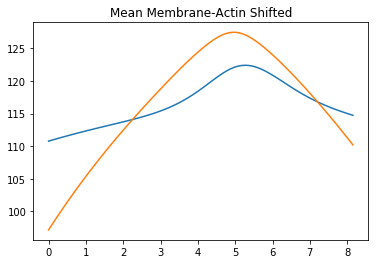

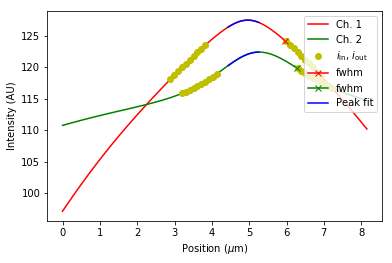

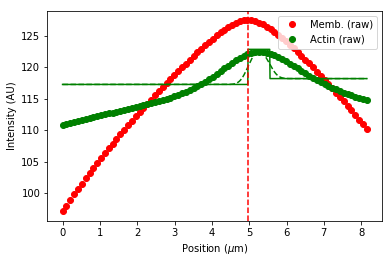

Thickness (nm), center cortex , cortical actin intensity (from fit) 586.6165863887165 5.256411572809425 122.84852208842507


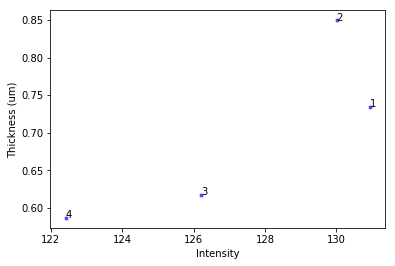

Thickness (min) 586.6165863887165 nm
Thickness (median) 675.7245796639172 nm
Thickness (max) 849.6170295306362 nm
block id 5


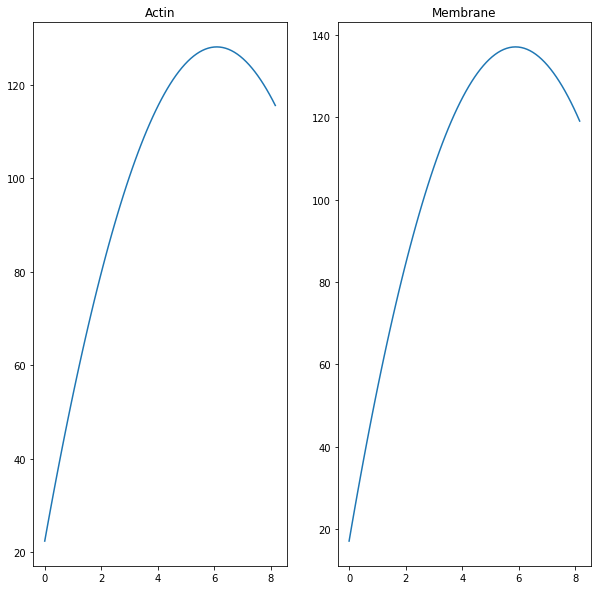

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 3.16151280e+05  2.61997950e+01  5.88509790e+00 -4.67695435e+03]
Actin Fit: [ 9.95129129e+04  1.89128212e+01  6.08287069e+00 -1.97093353e+03]


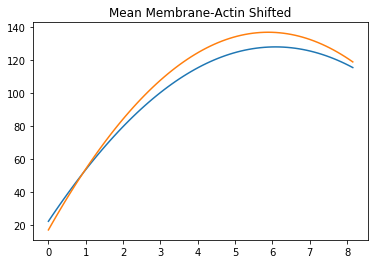

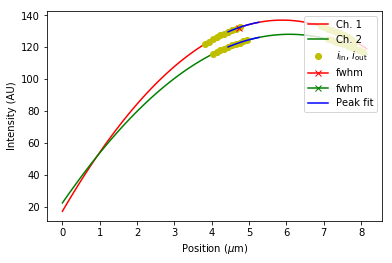

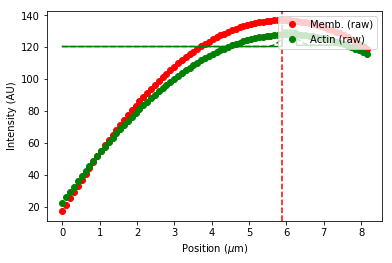

Thickness (nm), center cortex , cortical actin intensity (from fit) 382.8497893679954 6.076522798149831 130.7224813003218


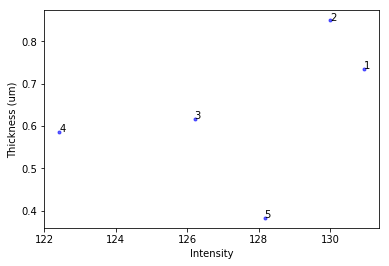

Thickness (min) 382.8497893679954 nm
Thickness (median) 617.3350412925055 nm
Thickness (max) 849.6170295306362 nm
block id 6


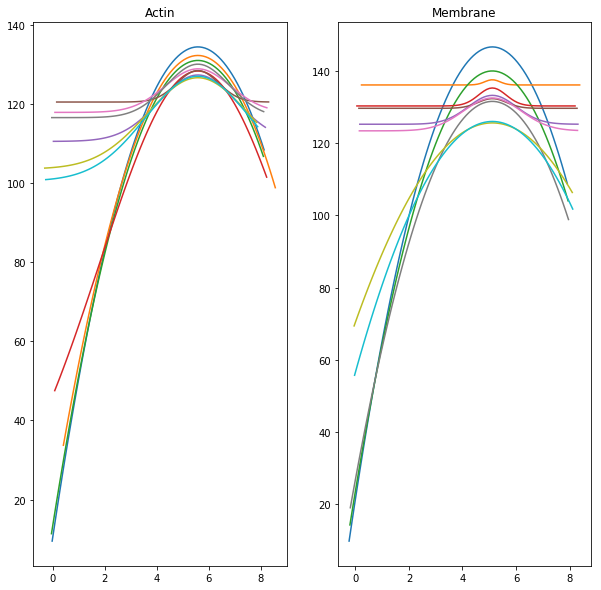

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 23.74692212   0.99528498   5.10056885 124.44307098]
Actin Fit: [ 89.560613     1.65022366   5.56458789 107.672372  ]


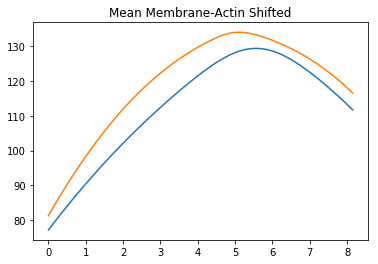

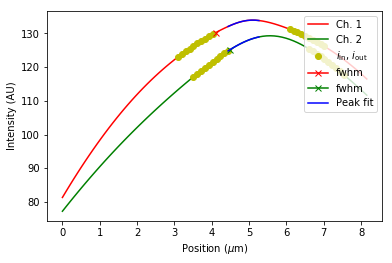

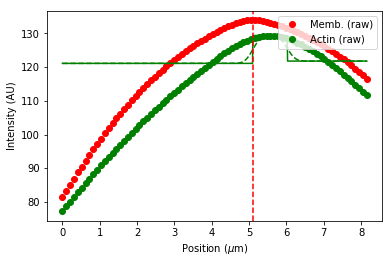

Thickness (nm), center cortex , cortical actin intensity (from fit) 922.6255919818028 5.561881649351177 129.3763930403021


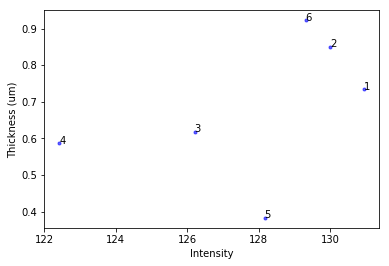

Thickness (min) 382.8497893679954 nm
Thickness (median) 675.7245796639172 nm
Thickness (max) 922.6255919818028 nm
block id 7


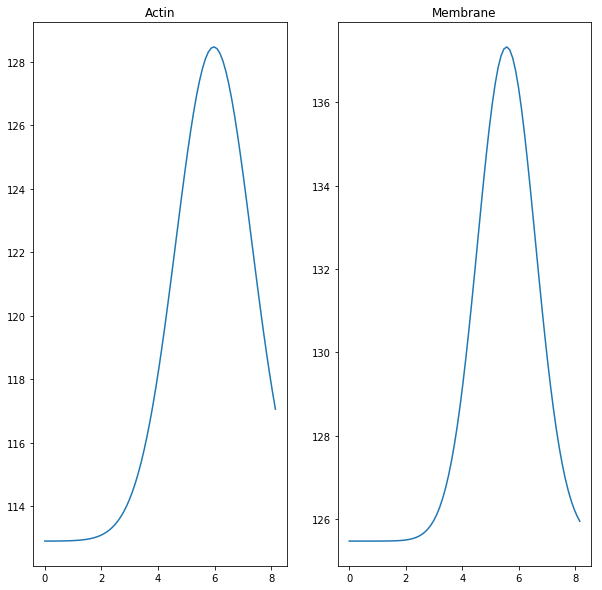

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 30.35106973   1.02091031   5.56336579 125.47394734]
Actin Fit: [ 52.33348259   1.34058518   5.97398819 112.89620483]


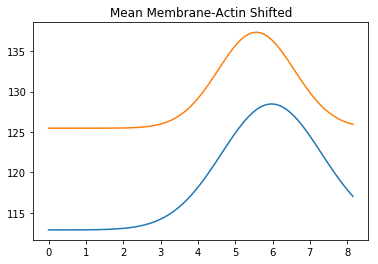

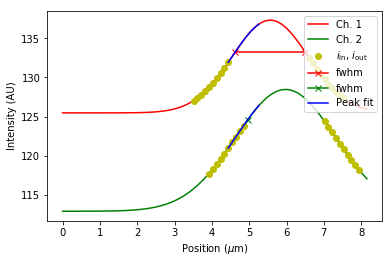

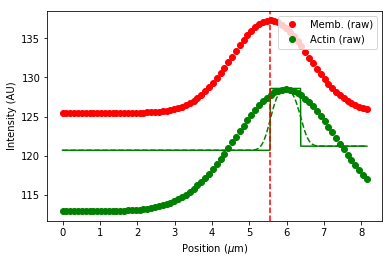

Thickness (nm), center cortex , cortical actin intensity (from fit) 816.3451935249457 5.971538386338932 128.59487833363696


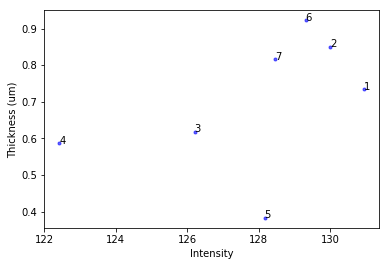

Thickness (min) 382.8497893679954 nm
Thickness (median) 734.1141180353289 nm
Thickness (max) 922.6255919818028 nm
block id 8


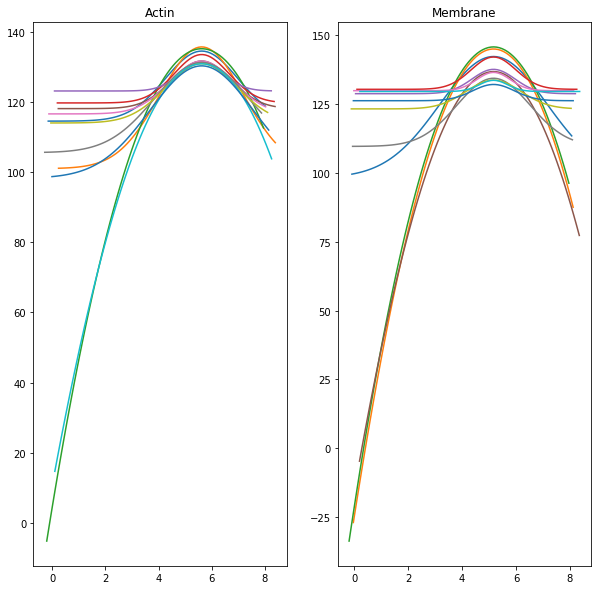

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 37.42963815   1.04382269   5.15748131 123.80007371]
Actin Fit: [ 72.48776576   1.41651855   5.60053055 111.84563986]


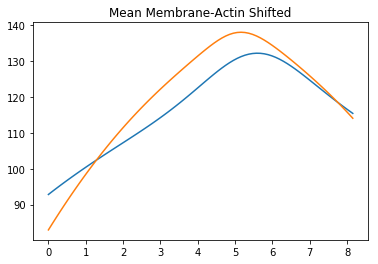

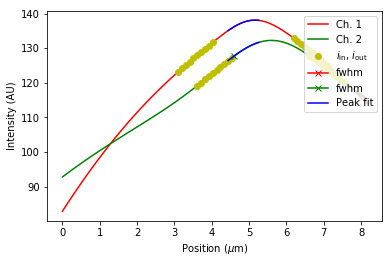

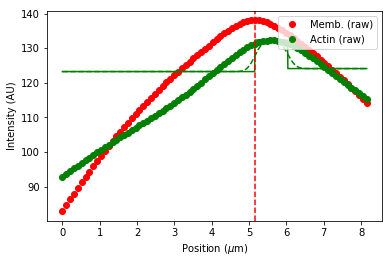

Thickness (nm), center cortex , cortical actin intensity (from fit) 879.503899704925 5.597233256676955 132.34460466018638


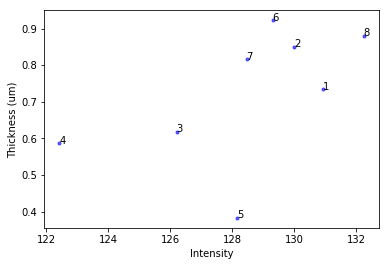

Thickness (min) 382.8497893679954 nm
Thickness (median) 775.2296557801373 nm
Thickness (max) 922.6255919818028 nm
Wall time: 11min 21s


In [4]:
%%time
global Thickness, Intensity, PeakActin, DataActin, PeakMembrane, DataMembrane, Time, ID, BlockAverageActin, BlockAverageMembrane
global Thickness_intensity, Thickness_id
#Fit all blocks

Thickness = []
Intensity = []
PeakActin = []
DataActin = []
PeakMembrane = []
DataMembrane = []
Time = []
ID = []

BlockAverageActin = []
BlockAverageMembrane = []
for i in range(0, totallength):
    
 BlockActin = []
 BlockMembrane = []
    
 print('block id', i+1) 
 currentid = i+1
 ID.append(i + 1)
 Actin = blockimageActin[i]
 Membrane = blockimageMembrane[i]
 
 StripFit(Membrane, Actin, Time_unit, Xcalibration, Fitaround, psf, inisigmaguess, showaftertime, Thickness, Intensity, PeakActin, BlockActin, PeakMembrane, BlockMembrane, BlockAverageActin,BlockAverageMembrane, Time, 0)
 Correlation_plot(Thickness, Intensity, ID)
 
 print("Thickness (min)",np.min(Thickness) *1000, "nm")
 print("Thickness (median)",np.median(Thickness) *1000, "nm")
 print("Thickness (max)",np.max(Thickness) *1000, "nm")
 
 Thickness_intensity = np.column_stack([Thickness, Intensity]) 
 
 Thickness_id = np.column_stack([Thickness, ID]) 
 

 #clear_output(wait = True)
    


In [5]:

master_data= []

Path(save_dir).mkdir(exist_ok = True)

for line in Thickness_id:
    master_data.append(line)
file =    open(save_dir + "/" + ( "Block" + os.path.basename(Actinimage))  +".csv", "w")
writer = csv.writer(file)
writer.writerows(master_data) 
file.close()


X: 129.85763245544294 Y:  0.7641759370242723
Standard deviation: 17.797629172167134
X: 124.31457078883449 Y:  0.601975813840611
Standard deviation: 17.797629172167134


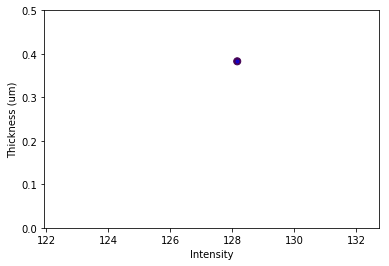

/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:628: RuntimeWarning: invalid value encountered in double_scalars
  m_right = (self.i[self.right_index_right] - self.i[self.right_index_left]) / (self.x[self.right_index_right] - self.x[self.right_index_left])
/Users/labo_dupe/Documents/GitHub/PyImage/utils\GaussFit.py:612: RuntimeWarning: invalid value encountered in double_scalars
  m_left = (self.i[self.left_index_right] - self.i[self.left_index_left]) /  (self.x[self.left_index_right] - self.x[self.left_index_left])


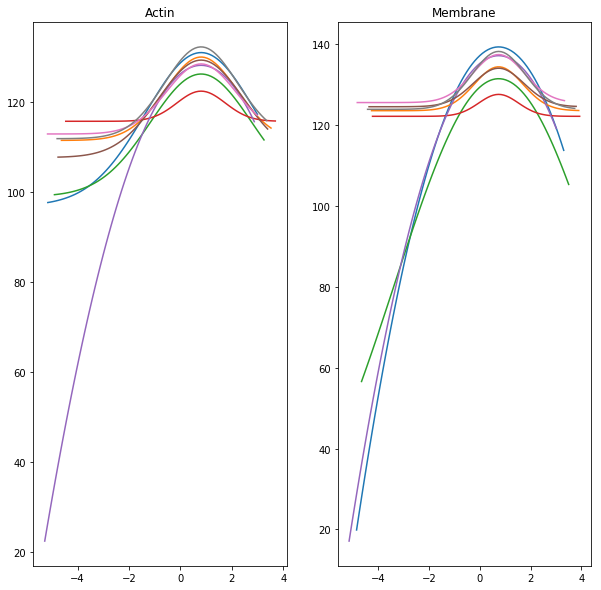

Membrane Fit: (Amp, Sigma, PeakPos, C) [ 77.95305893   1.48263473   0.7067418  113.46740029]
Actin Fit: [ 89.04455062   1.64269562   0.77807423 106.57661683]


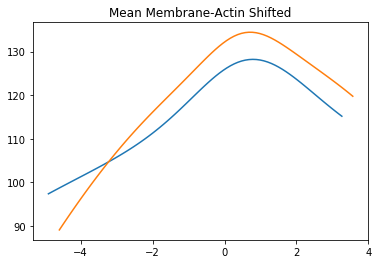

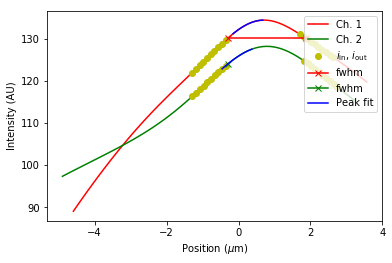

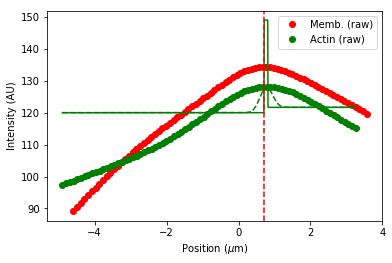

Thickness (nm), center cortex , cortical actin intensity (from fit) 111.8132459551345 0.7626484228448559 149.12665748037085


In [6]:
num_clusters = 2
show_intensity_plot(Thickness_intensity,save_dir,os.path.basename(Actinimage), ymin = 0, ymax = 0.5, num_clusters = num_clusters )



FinalThickness = []
FinalIntensity = []
FinalTime = []
FinalShiftFit(BlockAverageActin, BlockAverageMembrane, Time_unit, Xcalibration, Fitaround
             , psf, inisigmaguess, showaftertime,FinalThickness, FinalIntensity,   FinalTime, 0)

Final_master_data= []
Final_Thickness = np.column_stack([FinalThickness, os.path.basename(Actinimage)]) 


for line in Final_Thickness:
    Final_master_data.append(line)
Final_file =    open(save_dir + "/" + ( "Master" + os.path.basename(Actinimage))  +".csv", "w")
writer = csv.writer(Final_file)
writer.writerows(Final_master_data) 
Final_file.close()



In [7]:
hist, edges = np.histogram((Thickness), density=False, bins='auto')
p = figure(title="Estimated Cortex Thickness = " + str('%.5f'%np.abs(edges[np.argmax(hist)] * 1000)) + 'nm', y_axis_label='Counts',x_axis_label='Thickness(um)')
listedges = edges.tolist()
listhist = hist.tolist()
output_notebook()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
    fill_color="#036564", line_color="#033649")
for  i in range(0,len(listhist)):
  if listhist[i] > 0:
   mytext = Label(x=listedges[i], y=listhist[i], text=str('%.4f'%listedges[i]))
   p.add_layout(mytext)
show(p)    
export_png(p, filename=save_dir +  "/" +  'Bokeh_Histogram' + os.path.basename(Actinimage) + '.png')    

Loading BokehJS ...

'F:\\Ozge\\20190417_colorcorrected_croped\\box_10um_LS_20px_40umls_data_block\\Bokeh_HistogramCh2LineScan_C2-20190417_1x16_1TrackID1.tif.png'